In [91]:
from selenium import webdriver

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver import Chrome, ChromeOptions
import requests
import lxml.html
import pandas as pd
import time
import random
import matplotlib.font_manager as fm
import numpy as np
from wordcloud import WordCloud

from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from gensim.matutils import Sparse2Corpus
import re
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import warnings
import pyLDAvis.gensim
from sklearn.decomposition import TruncatedSVD #x를 분해 불필요한 부분을 자르는 svd 방법으로 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
kiwi = Kiwi()
kiwi.prepare()

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/3433916626.py:32: DeprecationWarning: `prepare()` has no effect and will be removed in future version.
  kiwi.prepare()


In [92]:
from bs4 import BeautifulSoup 
from selenium import webdriver

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver import Chrome, ChromeOptions
import requests
import lxml.html
import pandas as pd
import time
import random
import matplotlib.font_manager as fm
import numpy as np
from wordcloud import WordCloud

#from kiwipiepy import Kiwi
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#import tensorflow as tf
#from gensim.matutils import Sparse2Corpus
import re
#from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
#from gensim.corpora.dictioniary import Dictionary
#from gensim.models.ldamodel import LdaModel
#import warnings
#import pyLDAvis.gensim
#from sklearn.decomposition import TruncatedSVD #x를 분해 불필요한 부분을 자르는 svd 방법으로 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
#kiwi = Kiwi()
#kiwi.prepare()
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user

# 셀레늄 크롤링 시작

In [143]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pandas as pd

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("http://naver.com")



INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 95.0.4638
INFO:WDM:Current google-chrome version is 95.0.4638
Get LATEST chromedriver version for 95.0.4638 google-chrome
INFO:WDM:Get LATEST chromedriver version for 95.0.4638 google-chrome
Driver [C:\Users\82103\.wdm\drivers\chromedriver\win32\95.0.4638.69\chromedriver.exe] found in cache
INFO:WDM:Driver [C:\Users\82103\.wdm\drivers\chromedriver\win32\95.0.4638.69\chromedriver.exe] found in cache


In [144]:
driver.get("https://cafe.naver.com/remonterrace")
driver.implicitly_wait(3)

In [145]:
driver.find_element_by_name('query').send_keys('내돈내산')
driver.find_element_by_name("query").send_keys(Keys.ENTER)
time.sleep(2)

driver.switch_to.frame("cafe_main")

In [110]:
def move_next(browser):
    page_bar=driver.find_elements_by_css_selector('div.prev-next')[0]
    pages=page_bar.find_elements_by_css_selector('a')
    page_now=driver.find_elements_by_css_selector('a.on')[0].text
    for page in pages:
            page_num=page.text.strip()
            if page_num == '이전':
                pass
            elif page_num == '다음':
                page.send_keys('\n')
                time.sleep(2+random.uniform(0,1))
                return False
            elif int(page_num)>int(page_now):
                page.send_keys('\n')
                time.sleep(2+random.uniform(0,1))
                return False
    print('마지막 페이지')
    return True

In [146]:
#잉놈
list3 = []
list4 = []
list5 = []
for i in range(1,100):
    req = driver.page_source
    soup = BeautifulSoup(req, 'html.parser')
    titles = soup.select("#main-area > div:nth-child(7) > table > tbody > tr")
    print('----' + str(i) + ' 번째 페이지 -----')
    
    

    for a in range(1, 16):
        try:
            driver.find_element_by_xpath(f'//*[@id="main-area"]/div[5]/table/tbody/tr[{a}]/td[1]/div[2]/div/a').click()
            time.sleep(2)
        except NoSuchElementException:
            continue
        try:
            title_text=driver.find_element_by_class_name('title_text').text
            cont_explanation = driver.find_elements_by_css_selector('div.article_viewer > div > div' )[0].text
            list3.append(title_text)
            list4.append(cont_explanation)
            for i in range(len(driver.find_elements_by_css_selector('div.comment_text_box'))):
                review_text=driver.find_elements_by_css_selector('div.comment_text_box')[i].text
                list5.append(review_text)    
            driver.back()
            time.sleep(2)
            driver.switch_to.frame("cafe_main")
        except NoSuchElementException:
            driver.back()
            time.sleep(1)
            driver.switch_to.frame("cafe_main")

        
    is_done=move_next(driver)
    

----1 번째 페이지 -----
----2 번째 페이지 -----
----3 번째 페이지 -----
----4 번째 페이지 -----
----5 번째 페이지 -----
----6 번째 페이지 -----
----7 번째 페이지 -----
----8 번째 페이지 -----
----9 번째 페이지 -----
----10 번째 페이지 -----
----11 번째 페이지 -----
----12 번째 페이지 -----
----13 번째 페이지 -----
----14 번째 페이지 -----


WebDriverException: Message: chrome not reachable
  (Session info: chrome=95.0.4638.69)


In [147]:
#쌓인 데이터 데이터 프레임으로 변환
title_df=pd.DataFrame(list3)
text_df=pd.DataFrame(list4)
thatgul_df=pd.DataFrame(list5)
df=pd.concat([title_df,text_df],axis=1)
df.columns=['제목','내용']
df



,제목,내용
0,가사도우미 그만 오시라고 할 때,이번 주 3일 오셨는데 물건 자리 마음대로 바꾸시고\n(제가 다시 원위치 해놓아도 ...
1,다우니 실내건조 세탁세제 추천 빨래쉰냄새제거 탁월해요 :),[ 다우니 실내건조 세탁세제 추천 빨래쉰냄새제거 탁월해요 :) ]\n\n\n\n\n...
2,나이가드니 이해력이떨어져서...,쉽게뭔소리여요
3,고민고민하다가 폼포라웨건 결국 구입했어요,둘째낳고 고민 백번 하다가 결국 질렀네요 ㅎㅎ\n저같이 혹시 고민하시는분 계시면 강...
4,아메리슬립 메모리폼 매트리스 후기,직업 특성상 컴퓨터에 계속 오래 앉아 생활하다 보니 평소에 허리에 무리가 많이 가는...
...,...,...
119,프뢰벨 이용하시는 맘님들,아기 8개월 됫고 이제 곧 9개월되요\n프뢰벨 전집 들여주고싶은데\n프뢰벨쪽에서 토...
120,아이랑 입석탈때 휴대용 접이식 의자 유용했어요...,이번 설에는 좌석 성공해서 마음이 편하네요\n아이랑 입석으로 가면서 힘들었는데 별건...
121,내돈내산 크림 후기,저 피부 예민해서 피지오겔이랑 존슨즈로만 연명했는데\n언젠가부터 존슨즈는 보습이 부...
122,"우리 집 암막커텐 고민, 남대문시장 우성커튼에서 해결!(내돈내산 솔직후기)",최근 커튼을 새로 교체하면서 그동안 우리집 정리 프로젝트는 거의 다 끝난 것 같습니...


In [148]:
#데이터프레임 저장 
df.to_csv('레몬테라스내돈내산4 85~98페이지.csv')

In [149]:
thatgul_df.to_csv('레몬테라스내돈내산댓4.csv')

# 데이터merge

In [156]:
one=pd.read_csv('레몬테라스내돈내산1.csv')
two=pd.read_csv('레몬테라스내돈내산2 28페이지.csv')
three=pd.read_csv('레몬테라스내돈내산3 29~92페이지.csv')
four=pd.read_csv('레몬테라스내돈내산4 85~98페이지.csv')

In [157]:
one.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
two.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
three.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
four.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리

In [151]:
that_one=pd.read_csv('레몬테라스내돈내산댓글1.csv')
that_two=pd.read_csv('레몬테라스내돈내산댓글2.csv')

that_three=pd.read_csv('레몬테라스내돈내산댓글3.csv')

that_four=pd.read_csv('레몬테라스내돈내산댓4.csv')



In [158]:
that_one.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
that_two.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
that_three.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
that_four.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리

In [159]:
new_df=pd.concat([one,two,three,four],axis=0)

In [161]:
that_df=pd.concat([that_one,that_two,that_three,that_four],axis=0)

In [163]:
new_df.to_csv('내돈내산전체.csv')

In [164]:
that_df.to_csv('내돈내산댓글.csv')

In [201]:
title=pd.read_csv('내돈내산전체.csv')
comment=pd.read_csv('내돈내산댓글.csv')

In [202]:
title.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리
comment.drop(['Unnamed: 0'],axis=1,inplace=True)#스킨토너 전처리

In [203]:
comment.columns=['댓글']

In [204]:
title.loc[title.내용.isnull(),'내용']=''

In [236]:
comment.loc[comment.댓글.isnull(),'댓글']=''

In [206]:
title['제목']=title['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
title['제목']=title['제목'].str.replace('^ +', "")

title['내용']=title['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
title['내용']=title['내용'].str.replace('^ +', "")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/3392458336.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  title['제목']=title['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/3392458336.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  title['제목']=title['제목'].str.replace('^ +', "")
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/3392458336.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  title['내용']=title['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/3392458336.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  title['내용']=title['내용'].str.replace('^ +', "")


In [237]:
comment['댓글']=comment['댓글'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
comment['댓글']=comment['댓글'].str.replace('^ +', "")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/878278837.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  comment['댓글']=comment['댓글'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_13376/878278837.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  comment['댓글']=comment['댓글'].str.replace('^ +', "")


In [208]:
#2-4번코드
#한국 불용어 리스트 100개(일부 제외) + 데이터 분석후 불용어 제외 
stopwords = set(['뭐','호',"거", "것","저","때",'이거','수','데','감','히','후','이','있','하','것','들','그','되','이','보','않','없','나','사람','주','아니','등','같','우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두','말하','알','그러나','받','못하','일'
,'그런','또','문제','더','사회','많','그리고','크','따르','나오','가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','자신','안','어떤','내','경우'
,'명','생각','시간','그녀','다시','이런','앞','보이','번','나','다른','어떻','여자','개','전','들','사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','에','저','분','중','듯','형','식','비','옆','돌','쟁','엄','남','요거','청','쪽','통','존','겹','조','광',])
#kiwi를 활용한 명사만 뽑으며 불용어 사전을 통해 불용어를 제거한 형태소 분석 코드
def extract_keywords(text):
    result=kiwi.analyze(text)
    for token, pos, start, end in result[0][0]:
        if pos[0] in 'N' and token not in stopwords:
            yield f'{token}/{pos}'

In [209]:
#2-5번코드 최대한 많은 불필요한 단어 제거 
token_re = re.compile(r'\b\w{2,}\b', re.UNICODE) #양끝단사이에 2글자 이상있는것을 다뽑아라 영어 뿐만아니라 한국어도 가능 1글자짜리 무시하는것
def tokenizer(text):
    words=[]
    result=kiwi.analyze(text)
    for token,pos,start,end in result[0][0]:
        if pos[0] in 'N' and token not in stopwords:
            for word in token_re.findall(token):
                words.append(word)
    return words
            

# 제목 단어빈도분석

In [218]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
tfidf=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm2=tfidf.fit_transform(title['제목']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [219]:
#공통이용
words = tfidf.get_feature_names()

In [223]:
#클렌징폼 전체 단어 빈도(키위전처리)
word_count = pd.DataFrame({
    '단어': words,
    '빈도': tdm2.sum(axis=0).flat
})

word_sort=word_count.sort_values('빈도',ascending=False).head(30)
word_sort['단어']=word_sort.단어.str.split('/').str.get(0)
mymoney_title=word_sort

In [228]:
title_dic=mymoney_title.set_index('단어')['빈도'].to_dict()

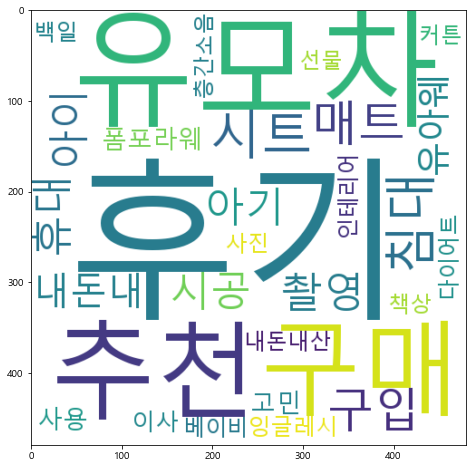

In [229]:
plt.figure(figsize=(8,8))
wc = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc.generate_from_frequencies(title_dic)


plt.imshow(wc, interpolation='bilinear')

In [230]:
mymoney_title

,단어,빈도
494,후기,72.977559
309,유모차,37.271905
427,추천,31.713555
35,구매,29.553337
218,시트,22.240291
432,침대,22.016203
109,매트,20.423715
38,구입,19.480873
424,촬영,15.859057
498,휴대,15.548654


# 내용 단어빈도 분석

In [232]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
tfidf=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm2=tfidf.fit_transform(title['내용']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

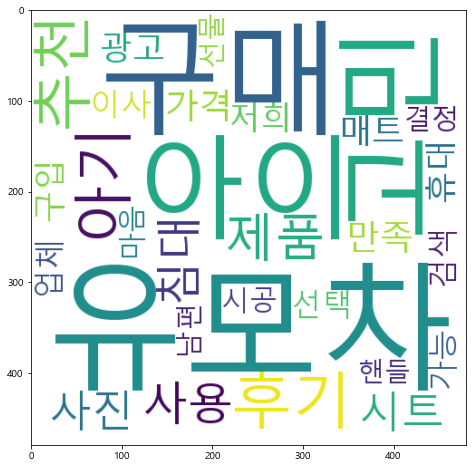

In [233]:
#공통이용
words = tfidf.get_feature_names()

#클렌징폼 전체 단어 빈도(키위전처리)
word_count = pd.DataFrame({
    '단어': words,
    '빈도': tdm2.sum(axis=0).flat
})

word_sort=word_count.sort_values('빈도',ascending=False).head(30)
word_sort['단어']=word_sort.단어.str.split('/').str.get(0)
mymoney_main=word_sort

main_dic=mymoney_main.set_index('단어')['빈도'].to_dict()

plt.figure(figsize=(8,8))
wc = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc.generate_from_frequencies(main_dic)


plt.imshow(wc, interpolation='bilinear')

In [234]:
mymoney_main

,단어,빈도
314,유모차,51.681471
52,구매,40.938395
263,아이,39.799798
37,고민,38.541279
497,후기,37.042561
259,아기,35.628963
420,추천,35.373394
374,제품,34.476665
191,사용,33.129941
427,침대,32.557170


# 내돈내산 댓글 단어빈도

C:\Users\82103\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


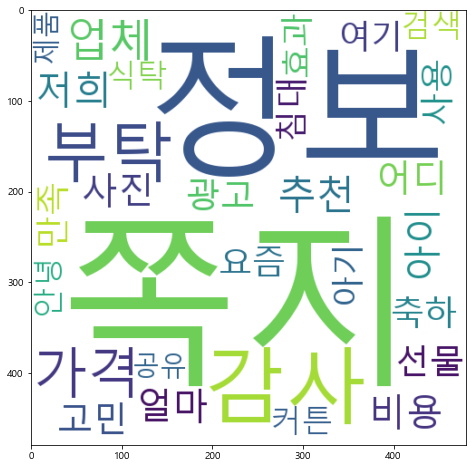

In [238]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
tfidf=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm2=tfidf.fit_transform(comment['댓글']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

#공통이용
words = tfidf.get_feature_names()

#클렌징폼 전체 단어 빈도(키위전처리)
word_count = pd.DataFrame({
    '단어': words,
    '빈도': tdm2.sum(axis=0).flat
})

word_sort=word_count.sort_values('빈도',ascending=False).head(30)
word_sort['단어']=word_sort.단어.str.split('/').str.get(0)
mymoney_comment=word_sort

comment_dic=mymoney_comment.set_index('단어')['빈도'].to_dict()

plt.figure(figsize=(8,8))
wc = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc.generate_from_frequencies(comment_dic)


plt.imshow(wc, interpolation='bilinear')

In [239]:
mymoney_comment

,단어,빈도
408,쪽지,445.986297
372,정보,303.035324
12,감사,258.304747
164,부탁,156.921856
0,가격,104.035213
282,업체,66.406106
424,추천,48.845032
366,저희,47.140207
177,비용,45.667375
265,아이,45.633160


# 주제분석

In [249]:
from gensim.models import CoherenceModel
from gensim import corpora, models
import gensim
#LDA에 어떤 경고를 무시
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [279]:
docs = []
for text in comment.댓글:
    doc = tokenizer(text)
    docs.append(doc)

In [280]:
dic = Dictionary(docs)

In [281]:
dic.filter_extremes(no_below=10,no_above=1)#엔 모스트 프리퀀트는 가장 자주 나오는 단어 기준으로, 익스트림은 극단적인단어, no_beolow = 일부 문서에서 사용된걸 제외 no_above= 너무 흔하게 나온 단어들은 제외 
                                            #10개이하의 문서 자르고 90퍼센트 이상의 문서에서 나오는것 잘라내기

In [282]:
corpus=[]
for doc in docs:
    bow=dic.doc2bow(doc) #bag of words
    corpus.append(bow)

In [283]:
train_corpus, valid_corpus = train_test_split(corpus, test_size=0.1, random_state=5432)

In [1]:
coherences=[]
perplexities=[]
dayang=[]
warnings.filterwarnings('ignore')

for i in range(2,50,3):
    lda4 = LdaModel(corpus, id2word=dic, num_topics=i)
    print('토픽 갯수 : {}개'.format(i))
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=corpus,texts=docs,dictionary=dic,coherence='c_v')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus))
    perplexities.append(lda4.log_perplexity(corpus))
    topn=25
    top_words=set()
    for topic in range(lda4.num_topics):
        for word, prob in lda4.show_topic(topic,topn=topn):
            top_words.add(word)
    summary=len(top_words)/(25*i)
    dayang.append(summary)
    print("주제 다양도:",summary,'\n\n')
    

NameError: name 'warnings' is not defined

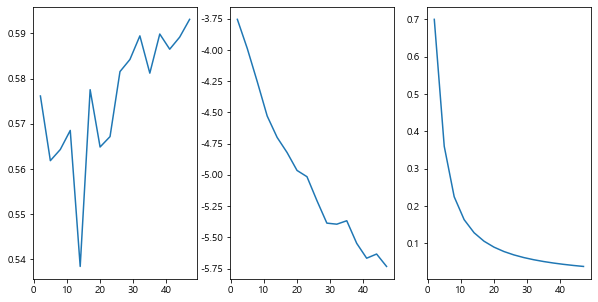

In [251]:
#6-3번 제목 토픽갯수 17가 최적값
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
x=range(2,50,3)
ax1.plot(x,coherences)
ax2.plot(x,perplexities)
ax3.plot(x,dayang)

plt.show()

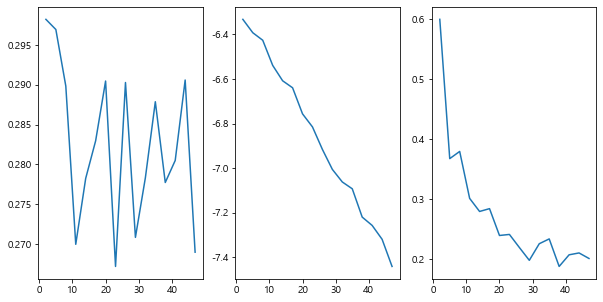

In [271]:
#6-3번 내용 토픽갯수 17가 최적값
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
x=range(2,50,3)
ax1.plot(x,coherences)
ax2.plot(x,perplexities)
ax3.plot(x,dayang)

plt.show()

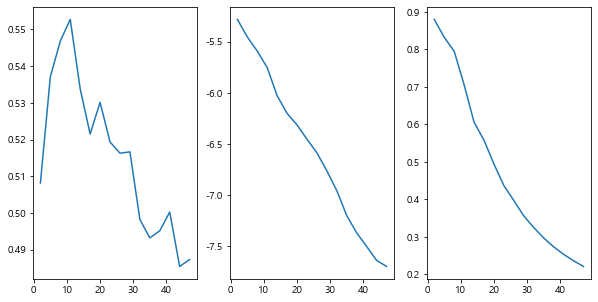

In [285]:
#6-3번 제목 토픽갯수 11가 최적값
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
x=range(2,50,3)
ax1.plot(x,coherences)
ax2.plot(x,perplexities)
ax3.plot(x,dayang)

plt.show()

# 모델링

In [286]:
#6-4번 코드 
model = LdaModel(
    corpus=train_corpus,
    id2word=dic,#번호하고 단어 짝지은것 
    num_topics=11,passes=10,
    random_state=1234)

In [287]:
loss = model.log_perplexity(valid_corpus)

In [288]:
old_loss=-np.inf
while loss > old_loss + 0.1:
    model.update(train_corpus)
    old_loss = loss
    loss = model.log_perplexity(valid_corpus)
    print(loss)

-7.3890548590588665


In [289]:
pyLDAvis.enable_notebook()

In [290]:
p = pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=False)

In [291]:
#클렌징폼
s=pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=True)

In [264]:
pyLDAvis.display(s)#토픽 번호가 하나씩 밀려있음 클릭해서 보면 관련된, 0으로지정해서보면 탑 30 샐리언트
#슬라이드 투 어드저스트 메트릭스 어떤 토픽하고 어떤단어가 관련된 정도를 계산할때 두가지 지표 사용 
# 1이 끝으로 가있으면 그 토픽에서 가장 많이나오는 단어 기준으로 계산한것  절대적
# 0으로 하면 평소에 그 단어가 나오는 비율대비해서 이토픽에선 얼마나 자주나오나 계산 상대적
# 보통 0.6정도 권장

# 내용 주제분석

In [278]:
pyLDAvis.display(s)#토픽 번호가 하나씩 밀려있음 클릭해서 보면 관련된, 0으로지정해서보면 탑 30 샐리언트
#슬라이드 투 어드저스트 메트릭스 어떤 토픽하고 어떤단어가 관련된 정도를 계산할때 두가지 지표 사용 
# 1이 끝으로 가있으면 그 토픽에서 가장 많이나오는 단어 기준으로 계산한것  절대적
# 0으로 하면 평소에 그 단어가 나오는 비율대비해서 이토픽에선 얼마나 자주나오나 계산 상대적
# 보통 0.6정도 권장

# 댓글 주제분석

In [292]:
pyLDAvis.display(s)#토픽 번호가 하나씩 밀려있음 클릭해서 보면 관련된, 0으로지정해서보면 탑 30 샐리언트
#슬라이드 투 어드저스트 메트릭스 어떤 토픽하고 어떤단어가 관련된 정도를 계산할때 두가지 지표 사용 
# 1이 끝으로 가있으면 그 토픽에서 가장 많이나오는 단어 기준으로 계산한것  절대적
# 0으로 하면 평소에 그 단어가 나오는 비율대비해서 이토픽에선 얼마나 자주나오나 계산 상대적
# 보통 0.6정도 권장